### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv('XOM.csv',delimiter=',',usecols=['date','open','high','low','close'])

In [ ]:
df.head()

,date,open,high,low,close
0,2014-07-14,102.169998,103.080002,102.160004,102.680000
1,2014-07-15,102.529999,102.599998,101.739998,102.389999
2,2014-07-16,102.559998,103.790001,102.540001,103.769997
3,2014-07-17,103.379997,103.889999,102.290001,102.309998
4,2014-07-18,102.690002,102.959999,101.860001,102.730003


In [ ]:
df1=df.reset_index()['close']

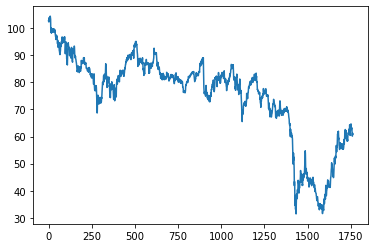

In [ ]:
plt.plot(df1)

In [ ]:
#LSTM is sensitive to the scale of the data. so we apply MinMax scaler 
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.97682388]
 [0.9728469 ]
 [0.99177172]
 ...
 [0.40839273]
 [0.40756989]
 [0.40359297]]


In [ ]:
#Splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:1]
test_data=df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1234, 529)

In [ ]:
train_data

array([[0.97682388],
       [0.9728469 ],
       [0.99177172],
       ...,
       [0.5778935 ],
       [0.56952826],
       [0.58776736]])

In [ ]:
test_data

array([[0.5914701 ],
       [0.59599564],
       [0.59503557],
       [0.58392755],
       [0.59284144],
       [0.58831591],
       [0.59846399],
       [0.60737789],
       [0.60161818],
       [0.61930881],
       [0.63411958],
       [0.6239714 ],
       [0.61464612],
       [0.61917164],
       [0.60847501],
       [0.61958303],
       [0.61862309],
       [0.60710366],
       [0.61697751],
       [0.6127262 ],
       [0.61752607],
       [0.61684034],
       [0.63165112],
       [0.63247391],
       [0.63329669],
       [0.62575425],
       [0.60998351],
       [0.60381241],
       [0.59503557],
       [0.59709265],
       [0.59818977],
       [0.60230391],
       [0.60216674],
       [0.59626985],
       [0.59462419],
       [0.6018924 ],
       [0.60202956],
       [0.58845308],
       [0.5623971 ],
       [0.55266042],
       [0.53250133],
       [0.54182662],
       [0.53551835],
       [0.56129998],
       [0.54018094],
       [0.52358742],
       [0.53538118],
       [0.496

In [ ]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   150 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
#Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1223, 10)
(1223,)


In [ ]:
print(X_test.shape), print(ytest.shape)

(518, 10)
(518,)


(None, None)

In [ ]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
#Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 86ms/step - loss: 0.1921 - val_loss: 0.0349
Epoch 2/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0100 - val_loss: 0.0561
Epoch 3/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0031 - val_loss: 0.0434
Epoch 4/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0021 - val_loss: 0.0364
Epoch 5/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0019 - val_loss: 0.0314
Epoch 6/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 0.0287
Epoch 7/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0016 - val_loss: 0.0267
Epoch 8/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0015 - val_loss: 0.0225
Epoch 9/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0217
Epoch 10/100
20/20 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.0183

20/20 [==============================] - 0s 25ms/step - loss: 8.2226e-04 - val_loss: 0.0065
Epoch 71/100
20/20 [==============================] - 0s 21ms/step - loss: 8.4068e-04 - val_loss: 0.0069
Epoch 72/100
20/20 [==============================] - 0s 23ms/step - loss: 7.8267e-04 - val_loss: 0.0062
Epoch 73/100
20/20 [==============================] - 0s 22ms/step - loss: 7.6021e-04 - val_loss: 0.0061
Epoch 74/100
20/20 [==============================] - 0s 23ms/step - loss: 7.5124e-04 - val_loss: 0.0065
Epoch 75/100
20/20 [==============================] - 0s 25ms/step - loss: 9.5998e-04 - val_loss: 0.0076
Epoch 76/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 77/100
20/20 [==============================] - 0s 22ms/step - loss: 8.4155e-04 - val_loss: 0.0072
Epoch 78/100
20/20 [==============================] - 0s 21ms/step - loss: 8.6423e-04 - val_loss: 0.0071
Epoch 79/100
20/20 [==============================] - 0s 20ms/step - los

In [ ]:
#Prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

84.22891459518333

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

60.056322856811455

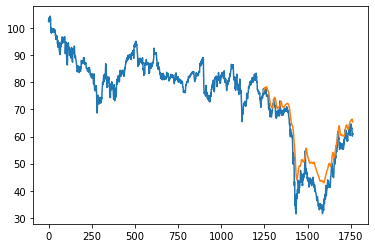

In [ ]:
#shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
data = df.copy(True)
data = data.drop(index=df.index[:1244],axis=0)
data = data.drop(index=df.index[1761:],axis=0)

In [ ]:
data.head()

,date,open,high,low,close
1244,2019-06-21,77.139999,77.760002,76.870003,77.690002
1245,2019-06-24,77.529999,77.760002,76.809998,76.949997
1246,2019-06-25,77.080002,77.220001,76.190002,76.269997
1247,2019-06-26,76.680000,77.129997,76.470001,76.599998
1248,2019-06-27,76.589996,76.750000,75.760002,75.820000


In [ ]:
for i in range(len(df)):
    if not np.isnan(testPredictPlot[i][0]):
        data['close'][i] = testPredictPlot[i][0]

<ipython-input-28-fe12a5242da7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close'][i] = testPredictPlot[i][0]


In [ ]:
data.to_csv(r'C:\Users\amaur\QIntern Project\QFolio_Deep_Reinforcement_Learning\stocks_data\XOM_NEW.csv')